In [89]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


from keras.models import Sequential
from keras.models import Model
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from numpy import array
import keras
import os
from sklearn.cluster import DBSCAN
import time

In [135]:
# 절대좌표,상대좌표 모두 표준화,정규화
def mousepreprocess(inputdf):
    mousedf = inputdf[['cursor_x', 'cursor_y', 'cursor_dx', 'cursor_dy']]
    restdf = inputdf.drop(columns = ['cursor_x', 'cursor_y', 'cursor_dx', 'cursor_dy'])

#     표준화
    standard_scaler = StandardScaler()
    fitted = standard_scaler.fit(mousedf)
    output = standard_scaler.transform(mousedf)

    # 정규화
    min_max_scaler = MinMaxScaler()
    fitted = min_max_scaler.fit(output)
    output = min_max_scaler.transform(output)
    
    df = pd.DataFrame(output, columns=mousedf.columns, index=list(mousedf.index.values))
    df = pd.concat([df, restdf], axis = 1)
    return df

#이병주교수님: 절대좌표 빼고 상대좌표는 표준화만
def mousepreprocess2(inputdf):
    mousedf = inputdf[['cursor_x', 'cursor_y']]
    restdf = inputdf.drop(columns = ['cursor_x', 'cursor_y', 'cursor_dx', 'cursor_dy'])

#     표준화
    standard_scaler = StandardScaler()
    fitted = standard_scaler.fit(mousedf)
    output = standard_scaler.transform(mousedf)

    # 정규화
#     min_max_scaler = MinMaxScaler()
#     fitted = min_max_scaler.fit(mousedf)
#     output = min_max_scaler.transform(mousedf)
    
    df = pd.DataFrame(output, columns=mousedf.columns, index=list(mousedf.index.values))
    df = pd.concat([df, restdf], axis = 1)
    return df

#어영정교수님: 절대좌표는 표준화,정규화 상대좌표는 표준화만
def mousepreprocess3(inputdf):
    mousedf1 = inputdf[['cursor_x', 'cursor_y']]
    mousedf2 = inputdf[['cursor_dx', 'cursor_dy']]

    restdf = inputdf.drop(columns = ['cursor_x', 'cursor_y', 'cursor_dx', 'cursor_dy'])

#     표준화
    standard_scaler = StandardScaler()
    fitted = standard_scaler.fit(mousedf1)
    output = standard_scaler.transform(mousedf1)

    # 정규화
    min_max_scaler = MinMaxScaler()
    fitted = min_max_scaler.fit(output)
    output = min_max_scaler.transform(output)
    
    standard_scaler = StandardScaler()
    fitted = standard_scaler.fit(mousedf2)
    output2 = standard_scaler.transform(mousedf2)
    
    
    df = pd.DataFrame(output, columns=mousedf1.columns, index=list(mousedf1.index.values))
    df2 = pd.DataFrame(output2, columns=mousedf2.columns, index=list(mousedf2.index.values))

    df = pd.concat([df, df2, restdf], axis = 1)
    return df

def mousepreprocess4(inputdf, filename):
    restdf = inputdf.drop(columns = ['cursor_x', 'cursor_y'])
    mousedfx = inputdf[['cursor_x']]
    mousedfy = inputdf[['cursor_y']]
    maxx = np.max(mousedfx)
    maxy = np.max(mousedfy)
    minx = np.min(mousedfx)
    miny = np.min(mousedfy)
#     print(maxx, minx)
#     print(maxy, miny)
    xrange = maxx - minx
    yrange = maxy - miny
    
    mousedfx = (mousedfx - minx) / xrange * 1920
    mousedfy = (mousedfy - miny) / yrange * 1080

    
    df1 = pd.DataFrame(mousedfx, columns=mousedfx.columns, index=list(mousedfx.index.values))
    df2 = pd.DataFrame(mousedfy, columns=mousedfy.columns, index=list(mousedfy.index.values))
    df = pd.concat([df1, df2, restdf], axis = 1)

    return df


def generatedata(paddingdir, pretype):
    
    propaddingfilenames = os.listdir(paddingdir + '/pro')
    generalpaddingfilenames = os.listdir(paddingdir + '/general')
    
    first = True
    for paddingfile in propaddingfilenames:
        if pretype == 2:
            if first:
                df = pd.read_csv(f'data_padding/pro/{paddingfile}', sep=',')
                resultdf = mousepreprocess2(df)
                first = False
            else:
                df = pd.read_csv(f'data_padding/pro/{paddingfile}', sep=',')
                df = mousepreprocess2(df)
                resultdf = pd.concat([resultdf, df], axis=0)
        if pretype == 3:
            if first:
                df = pd.read_csv(f'data_padding/pro/{paddingfile}', sep=',')
                resultdf = mousepreprocess3(df)
                first = False
            else:
                df = pd.read_csv(f'data_padding/pro/{paddingfile}', sep=',')
                df = mousepreprocess3(df)
                resultdf = pd.concat([resultdf, df], axis=0)
                
        if pretype == 4:
            if first:
                df = pd.read_csv(f'data_padding/pro/{paddingfile}', sep=',')
                resultdf = mousepreprocess4(df, paddingfile)
                first = False
            else:
                df = pd.read_csv(f'data_padding/pro/{paddingfile}', sep=',')
                df = mousepreprocess4(df, paddingfile)
                resultdf = pd.concat([resultdf, df], axis=0)
    
    resultdf = resultdf.drop(columns = ['timestamp','speed','filtered_speed','submovementlabel','count','Forelol','dx_mm','dy_mm'])
    resultdf.to_csv(f'proalldata{pretype}.csv', index= None)
    
    first = True
    for paddingfile in generalpaddingfilenames:
        if pretype == 2:
            if first:
                df = pd.read_csv(f'data_padding/general/{paddingfile}', sep=',')
                resultdf2 = mousepreprocess2(df)
                first = False
            else:
                df = pd.read_csv(f'data_padding/general/{paddingfile}', sep=',')
                df = mousepreprocess2(df)
                resultdf2 = pd.concat([resultdf2, df], axis=0)
        if pretype == 3:
            if first:
                df = pd.read_csv(f'data_padding/general/{paddingfile}', sep=',')
                resultdf2 = mousepreprocess3(df)
                first = False
            else:
                df = pd.read_csv(f'data_padding/general/{paddingfile}', sep=',')
                df = mousepreprocess3(df)
                resultdf2 = pd.concat([resultdf2, df], axis=0)
                
        if pretype == 4:
            if first:
                df = pd.read_csv(f'data_padding/general/{paddingfile}', sep=',')
                resultdf2 = mousepreprocess4(df, paddingfile)
                first = False
            else:
                df = pd.read_csv(f'data_padding/general/{paddingfile}', sep=',')
                df = mousepreprocess4(df, paddingfile)
                resultdf2 = pd.concat([resultdf2, df], axis=0)
                
    resultdf2 = resultdf2.drop(columns = ['timestamp','speed','filtered_speed','submovementlabel','count','Forelol','dx_mm','dy_mm'])
    resultdf2.to_csv(f'generalalldata{pretype}.csv', index= None)
    
    return resultdf, resultdf2


In [141]:
#이미 있으면 이걸로
DATA_PADDING_FOLDER = "./data_padding"
datatype = 3
# df1 = pd.read_csv(f'proalldata{datatype}.csv', sep=',')
# df2 = pd.read_csv(f'generalalldata{datatype}.csv', sep=',')

#데이터 추가되면 이걸로 한번 돌리기
df1, df2 = generatedata(DATA_PADDING_FOLDER,datatype)
concatdf = pd.concat([df1,df2], axis=0)

concatdf = concatdf.drop(columns = ['Unnamed: 0'])
# concatdf.to_csv(f'progeneralalldata{datatype}.csv', index= None)

trainData, validData = splitData(concatdf, (0.8, 0.2))

In [159]:
concatdf.shape

(761670, 94)

In [143]:
features = concatdf.shape[1]
timestep = 30

trainSequence = makeSequence(trainData)
validSequence = makeSequence(validData)

from keras.losses import mean_squared_error, binary_crossentropy

def my_custom_loss(y_true, y_pred):
    mouse_true = y_true[:,:,:4]
    mouse_pred = y_pred[:,:,:4]
    rest_true = y_true[:,:,4:]
    rest_pred = y_pred[:,:,4:]
    
    mse = mean_squared_error(mouse_true, mouse_pred)
    crossentropy = binary_crossentropy(rest_true, rest_pred)
    return 0.4 * mse + 0.6* crossentropy

samples: 19041, n_in: 571230
samples: 6348, n_in: 190440


In [147]:
dimension = int(features/6)

model = Sequential()
model.add(LSTM(features, activation='tanh', input_shape=(timestep,features), return_sequences=True))
model.add(Dropout(0.5))
# model.add(BatchNormalization())
model.add(LSTM(int(features/2), activation='tanh', return_sequences=True))
# model.add(LSTM(int(features/2), activation='tanh', return_sequences=True))
model.add(LSTM(int(features/2), activation='tanh', return_sequences=True))
model.add(LSTM(int(features/2), activation='tanh', return_sequences=True))
model.add(LSTM(int(features/4), activation='tanh', return_sequences=True))
model.add(LSTM(int(features/4), activation='tanh', return_sequences=True))
model.add(LSTM(int(features/6), activation='tanh', return_sequences=True))
model.add(LSTM(dimension, activation='tanh', return_sequences=False))
model.add(RepeatVector(timestep))
model.add(LSTM(dimension, activation='tanh', return_sequences=True))
model.add(LSTM(int(features/6), activation='tanh', return_sequences=True))
model.add(LSTM(int(features/4), activation='tanh', return_sequences=True))
model.add(LSTM(int(features/4), activation='tanh', return_sequences=True))
model.add(LSTM(int(features/2), activation='tanh', return_sequences=True))
model.add(LSTM(int(features/2), activation='tanh', return_sequences=True))
# model.add(LSTM(int(features/2), activation='tanh', return_sequences=True))
model.add(LSTM(int(features/2), activation='tanh', return_sequences=True))
model.add(LSTM(features, activation='tanh', return_sequences=True))
model.add(TimeDistributed(Dense(features)))


model.summary()
model.compile(optimizer= 'adam', loss=my_custom_loss, metrics=['accuracy'])



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_90 (LSTM)               (None, 30, 94)            71064     
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 94)            0         
_________________________________________________________________
lstm_91 (LSTM)               (None, 30, 47)            26696     
_________________________________________________________________
lstm_92 (LSTM)               (None, 30, 47)            17860     
_________________________________________________________________
lstm_93 (LSTM)               (None, 30, 47)            17860     
_________________________________________________________________
lstm_94 (LSTM)               (None, 30, 23)            6532      
_________________________________________________________________
lstm_95 (LSTM)               (None, 30, 23)           

In [148]:
now = time.strftime('%m%d_%H%M', time.localtime(time.time()))
SAVE_FOLDER = 'models'
FOLDER_NAME = now + "_" + 'allData'

FOLDER_PATH = os.path.join(SAVE_FOLDER, FOLDER_NAME)
if not os.path.isdir(FOLDER_PATH):
    os.makedirs(FOLDER_PATH)

MODEL_NAME = 'allData' + '_{epoch:02d}-{loss:.2f}.h5'
MODEL_PATH = os.path.join(FOLDER_PATH, MODEL_NAME)
print(MODEL_PATH)

# 모델의 가중치를 저장하는 콜백 만들기
modelCheckpoint = keras.callbacks.ModelCheckpoint(filepath=MODEL_PATH, save_weights_only=True, verbose=1, save_best_only=True)
earlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='auto', restore_best_weights=True)
callbacks = [modelCheckpoint, earlyStopping]

models\1124_0314_allData\allData_{epoch:02d}-{loss:.2f}.h5


In [149]:

history = model.fit(trainSequence, trainSequence,
                     epochs= 15,
                    validation_data = (validSequence, validSequence),
                    callbacks=callbacks,
                    batch_size=40
                     )
# model.save(model_path)

# new_model = keras.models.load_model('my_model.h5')  #모델 불러오기

Epoch 1/15
477/477 [==============================] - 48s 67ms/step - loss: 0.2126 - accuracy: 0.3244 - val_loss: 0.1367 - val_accuracy: 0.4327

Epoch 00001: val_loss improved from inf to 0.13667, saving model to models\1124_0314_allData\allData_01-0.18.h5
Epoch 2/15
477/477 [==============================] - 28s 59ms/step - loss: 0.1250 - accuracy: 0.4464 - val_loss: 0.1013 - val_accuracy: 0.4636

Epoch 00002: val_loss improved from 0.13667 to 0.10129, saving model to models\1124_0314_allData\allData_02-0.11.h5
Epoch 3/15
477/477 [==============================] - 28s 59ms/step - loss: 0.0848 - accuracy: 0.4801 - val_loss: 0.0935 - val_accuracy: 0.4862

Epoch 00003: val_loss improved from 0.10129 to 0.09350, saving model to models\1124_0314_allData\allData_03-0.08.h5
Epoch 4/15
477/477 [==============================] - 28s 59ms/step - loss: 0.0743 - accuracy: 0.4972 - val_loss: 0.0724 - val_accuracy: 0.4849

Epoch 00004: val_loss improved from 0.09350 to 0.07245, saving model to mode

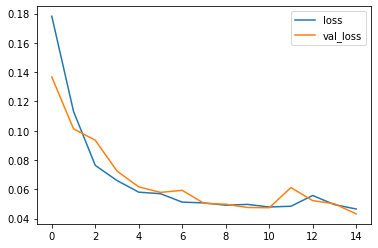

In [150]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [165]:
def getVectorModel(model):
    vectormodel = Model(inputs=model.inputs, outputs=model.layers[8].output)
    return vectormodel

def getLowDim(vectormodel, sequence):
    lowdim = vectormodel.predict(sequence)
    return lowdim

def trainDBScan(lowdimdf, eps, n_samples):
    dbscan = DBSCAN(eps=eps, min_samples=n_samples)
    dbclusters = dbscan.fit_predict(np.array(lowdim))

    dbresult = lowdimdf.copy()
    dbresult["cluster"] = dbclusters
    labelNum = len(set(dbclusters))
    
    if labelNum <= 2:
        print(f'Label Num is TOO small: {labelNum}')
        return
    
    dbscore_samples = silhouette_samples(lowdim, dbresult['cluster'])
    dbresult['silhouette_coeff'] = dbscore_samples
    dbaverage_score = silhouette_score(lowdim, dbresult['cluster'])
    
    print('eps:', eps, ' and min_samples:', n_samples, ' -> Number of Cluster:', labelNum, '/ Silhouette score before removing noise:', dbaverage_score)
    return dbresult, labelNum, dbaverage_score

def removeNoiseLabel(dbresult):
    isCluster = []
    for i in range(len(dbresult)):
        if dbresult.iloc[i]['cluster'] >= 0:
            isCluster.append(True)
        else:
            isCluster.append(False)
            
    newresult = dbresult[isCluster]
    
    newlowdim = np.array(newresult.drop(['cluster', 'silhouette_coeff'], axis=1))
    newscore_samples = silhouette_samples(newlowdim, newresult['cluster'])
    
    labelNumAfterRemovingNoise = len(set(newresult['cluster']))
    
    if labelNumAfterRemovingNoise <= 2:
        print(f'Label Num After removing noise is TOO small: {labelNumAfterRemovingNoise}')
        return

    
    newresult = newresult.drop('silhouette_coeff', axis=1)
    newresult['silhouette_coeff'] = np.array(newscore_samples)
    newaverage_score = silhouette_score(newlowdim, newresult['cluster'])
    
    print(f'Number of Cluster: {labelNumAfterRemovingNoise}, Silhouette score after removing noise: {newaverage_score}')
    
    aUnique = np.array(newresult['cluster'])
    unique, counts = np.unique(aUnique, return_counts=True)
    print(counts)

    multipleScore = newaverage_score * len(counts)
    print(f'Final Score = # of cluster * sillhouette score = {multipleScore}')

    return newresult, labelNumAfterRemovingNoise, newaverage_score, len(counts), multipleScore

def trainTSNEAndVisualize(newresult):
    newlowdim = np.array(newresult.drop(['cluster', 'silhouette_coeff'], axis=1))
    
    TSNE_model = TSNE(learning_rate=50)
    tsne = TSNE_model.fit_transform(newlowdim)
    xs = tsne[:,0]
    ys = tsne[:,1]
    plt.figure(1, figsize=(10,5))
    plt.scatter(xs, ys)

    dbtsnedf = pd.DataFrame(tsne)
    dbtsnedf["cluster"] = np.array(newresult['cluster'], dtype='int')
    
    print('dimension:', dimension, 'timestep: ', 30)

    plt.figure(2,figsize = (10,5))

    sns.scatterplot(x=0, y=1, hue="cluster", data=dbtsnedf, palette="Set3")
    plt.show()
    
def makeSequence(concatdf):
    n_in = len(concatdf)
    samples = int(concatdf.shape[0] / timestep)
    print(f'samples: {samples}, n_in: {n_in}')
    concatdf = concatdf.astype(float)
    sequence = concatdf.to_numpy().reshape(samples, timestep, features) #samples, timesteps, features
    sequence = sequence.astype(float)
    return sequence

def splitData(data, ratio, timestep=30):
    # ratio = ( train, valid, test )
    numSubMovement = len(data)//timestep
    numTrain, numValid = int(ratio[0]*numSubMovement), int(ratio[1]*numSubMovement)
    currentIdx = 0
    idx_train, idx_valid = train_test_split(np.arange(numSubMovement))
    idx_train, idx_valid = sorted(idx_train), sorted(idx_valid)

    idx_list = list()
    
    for i in range(numSubMovement):
        if len(idx_train) >= 1 and idx_train[0] == i:
            idx_list += [True] * timestep
            idx_train.pop(0)
        elif len(idx_valid) >= 1 and idx_valid[0] == i:
            idx_list += [False] * timestep
            idx_valid.pop(0)
        else:
            print("Error:", numSubMovement)
            
    trainData = data[idx_list]
    validData = data[[not idx for idx in idx_list]]
    
    return trainData, validData

In [171]:
vectormodel = getVectorModel(model)
vectormodel.summary()
lowdim = getLowDim(vectormodel, makeSequence(concatdf))
lowdimdf = pd.DataFrame(lowdim)

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_90_input (InputLayer)   [(None, 30, 94)]          0         
_________________________________________________________________
lstm_90 (LSTM)               (None, 30, 94)            71064     
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 94)            0         
_________________________________________________________________
lstm_91 (LSTM)               (None, 30, 47)            26696     
_________________________________________________________________
lstm_92 (LSTM)               (None, 30, 47)            17860     
_________________________________________________________________
lstm_93 (LSTM)               (None, 30, 47)            17860     
_________________________________________________________________
lstm_94 (LSTM)               (None, 30, 23)            6532

In [172]:
scoreAndParameter = list()
# for eps in [0.005, 0.01, 0.015,0.02, 0.025]:
for eps in [0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1]:

    for n_sample in [30, 50, 100]:
        print('-'*20)
        print(f'eps: {eps}, n_samples: {n_sample}')
        dbresults = trainDBScan(lowdimdf, eps,  n_sample)
        if dbresults == None:
            continue
            
        newresults = removeNoiseLabel(dbresults[0])
        
        if newresults == None:
            continue

        scoreAndParameter.append([newresults[2], eps, n_sample])
        

--------------------
eps: 0.02, n_samples: 30
Label Num is TOO small: 1
--------------------
eps: 0.02, n_samples: 50
Label Num is TOO small: 1
--------------------
eps: 0.02, n_samples: 100
Label Num is TOO small: 1
--------------------
eps: 0.025, n_samples: 30
Label Num is TOO small: 1
--------------------
eps: 0.025, n_samples: 50
Label Num is TOO small: 1
--------------------
eps: 0.025, n_samples: 100
Label Num is TOO small: 1
--------------------
eps: 0.03, n_samples: 30
Label Num is TOO small: 1
--------------------
eps: 0.03, n_samples: 50
Label Num is TOO small: 1
--------------------
eps: 0.03, n_samples: 100
Label Num is TOO small: 1
--------------------
eps: 0.035, n_samples: 30
Label Num is TOO small: 1
--------------------
eps: 0.035, n_samples: 50
Label Num is TOO small: 1
--------------------
eps: 0.035, n_samples: 100
Label Num is TOO small: 1
--------------------
eps: 0.04, n_samples: 30
eps: 0.04  and min_samples: 30  -> Number of Cluster: 3 / Silhouette score befor

eps: 0.065  and min_samples: 50  -> Number of Cluster: 8 / Silhouette score before removing noise: -0.3863706
Number of Cluster: 7, Silhouette score after removing noise: -0.04976662993431091
[7053  271   52  119   93   53   41]
Final Score = # of cluster * sillhouette score = -0.3483664095401764
dimension: 15 timestep:  30


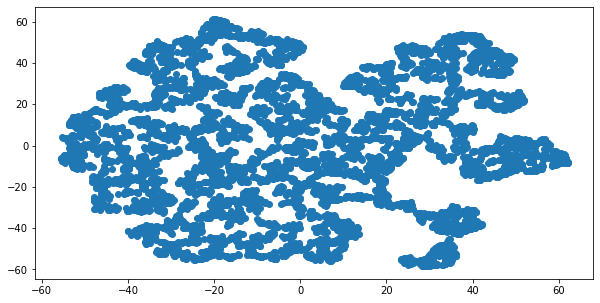

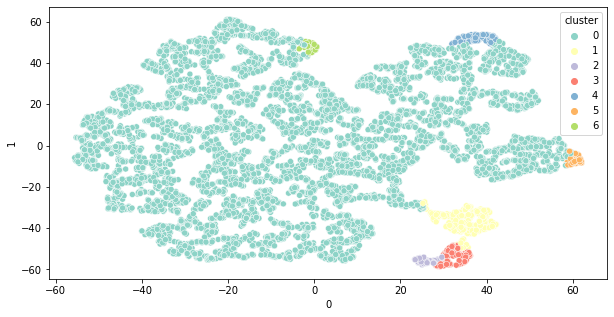

In [174]:
maxDBscanResult = trainDBScan(lowdimdf, maxEps, maxMinSamples)
maxDbscanResultAfterRefining = removeNoiseLabel(maxDBscanResult[0])
trainTSNEAndVisualize(maxDbscanResultAfterRefining[0])

eps: 0.065  and min_samples: 50  -> Number of Cluster: 8 / Silhouette score before removing noise: -0.3863706


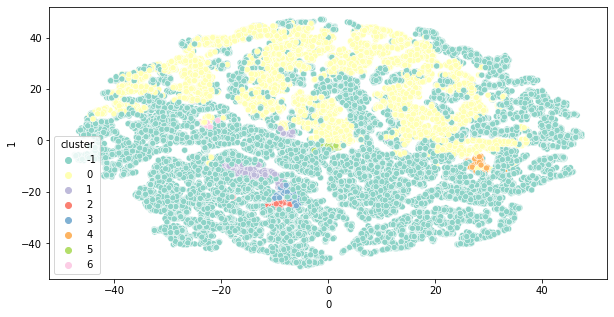

In [194]:
dbresult = trainDBScan(lowdimdf, 0.065,  50)

tsnedf = pd.DataFrame(tsne)
tsnedf["cluster"] =dbresult[0]['cluster']
plt.figure(2,figsize = (10,5))

sns.scatterplot(x=0, y=1, hue="cluster", data=tsnedf, palette="Set3")
plt.show()

In [193]:
dbresult[0]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,cluster,silhouette_coeff
0,-0.297056,-0.402748,0.039324,0.403353,0.304173,0.489817,0.111268,-0.296345,-0.016779,0.030656,-0.260824,-0.351937,0.036387,-0.602797,0.220577,-1,-0.305374
1,0.063684,-0.149288,0.119746,0.065924,-0.015526,0.178428,-0.018821,-0.000522,0.128148,-0.083541,-0.237841,-0.340375,-0.050468,-0.422067,0.314014,-1,-0.725684
2,0.060957,0.000035,0.083877,0.046992,-0.047344,0.002979,-0.062933,-0.058997,0.199469,-0.104884,-0.194051,-0.257519,0.027428,-0.214152,0.093414,-1,-0.702582
3,0.065855,-0.189978,0.115871,0.072603,-0.023550,0.277454,0.083590,0.017345,0.196789,0.012088,-0.194737,-0.268991,-0.100569,-0.426107,0.297379,0,-0.530217
4,-0.053901,-0.226399,0.078338,0.175284,0.071209,0.326191,0.080412,-0.097763,0.170134,0.011339,-0.196105,-0.268394,-0.023526,-0.467747,0.232075,0,-0.821740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25384,-0.002915,-0.150232,0.104495,0.104525,0.016013,0.206367,0.009925,-0.035920,0.129443,-0.057818,-0.223328,-0.311895,-0.022682,-0.433460,0.276720,-1,-0.697050
25385,0.164612,-0.124177,0.115711,-0.005314,-0.185704,0.245490,0.153020,0.095846,0.263937,0.072802,-0.122784,-0.092657,-0.199766,-0.255475,0.181171,-1,-0.455280
25386,-0.105782,-0.247711,0.051624,0.214697,0.120141,0.364404,0.112159,-0.145253,0.159983,0.048709,-0.176248,-0.231743,-0.000655,-0.464067,0.176211,-1,-0.724073
25387,-0.042221,-0.265770,0.062251,0.114093,0.032716,0.361893,0.249237,-0.002676,0.232023,0.163104,-0.076014,-0.065496,-0.089609,-0.393269,0.174019,-1,-0.540515


eps: 0.045  and min_samples: 30  -> Number of Cluster: 12 / Silhouette score before removing noise: -0.4544701
Number of Cluster: 11, Silhouette score after removing noise: 0.2916056215763092
[642  97  46  31  30  47  54  70  30  44  30]
Final Score = # of cluster * sillhouette score = 3.2076618373394012
dimension: 15 timestep:  30


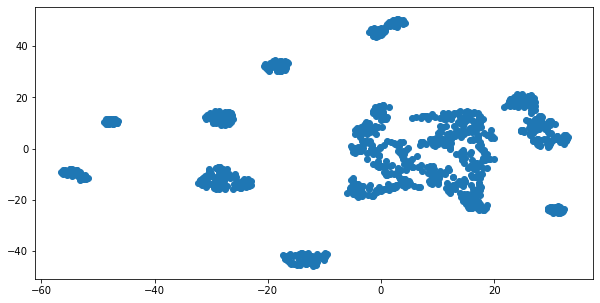

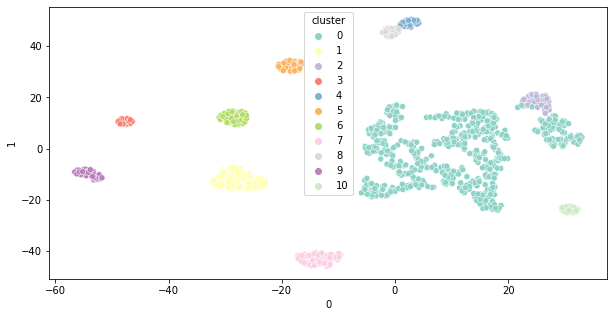

In [175]:
maxScoreArg = np.argmax([score_arg[0] for score_arg in scoreAndParameter])
maxEps, maxMinSamples = scoreAndParameter[maxScoreArg][1:3]

maxDBscanResult = trainDBScan(lowdimdf, maxEps, maxMinSamples)
maxDbscanResultAfterRefining = removeNoiseLabel(maxDBscanResult[0])
trainTSNEAndVisualize(maxDbscanResultAfterRefining[0])

In [185]:
maxDBscanResult

(              0         1         2         3         4         5         6  \
 0     -0.297056 -0.402748  0.039324  0.403353  0.304173  0.489817  0.111268   
 1      0.063684 -0.149288  0.119746  0.065924 -0.015526  0.178428 -0.018821   
 2      0.060957  0.000035  0.083877  0.046992 -0.047344  0.002979 -0.062933   
 3      0.065855 -0.189978  0.115871  0.072603 -0.023550  0.277454  0.083590   
 4     -0.053901 -0.226399  0.078338  0.175284  0.071209  0.326191  0.080412   
 ...         ...       ...       ...       ...       ...       ...       ...   
 25384 -0.002915 -0.150232  0.104495  0.104525  0.016013  0.206367  0.009925   
 25385  0.164612 -0.124177  0.115711 -0.005314 -0.185704  0.245490  0.153020   
 25386 -0.105782 -0.247711  0.051624  0.214697  0.120141  0.364404  0.112159   
 25387 -0.042221 -0.265770  0.062251  0.114093  0.032716  0.361893  0.249237   
 25388 -0.125561 -0.054628 -0.158517  0.153568  0.144913  0.246302  0.163725   
 
               7         8         9  

In [176]:
cluster = []
score = []

# create model and prediction
for i in range(2, 20, 2):
    lowdimdf = pd.DataFrame(lowdim)
    Kmeansmodel = KMeans(n_clusters= i,algorithm='auto')
    Kmeansmodel.fit(lowdim)

    result = lowdimdf.copy()
    result["cluster"] = Kmeansmodel.labels_

        # result의 모든 개별 데이터에 실루엣 계수값을 구함. 
    score_samples = silhouette_samples(lowdim, result['cluster'])
    # print(score_samples)

    # result에 실루엣 계수 컬럼 추가
    result['silhouette_coeff'] = score_samples

    # 모든 데이터의 평균 실루엣 계수값을 구함.
    average_score = silhouette_score(lowdim, result['cluster'])
    print(i, 'Silhouette Analysis Score:', average_score)
    score.append(average_score)
    cluster.append(i)


2 Silhouette Analysis Score: 0.30488458
4 Silhouette Analysis Score: 0.27754405
6 Silhouette Analysis Score: 0.27470875
8 Silhouette Analysis Score: 0.25665823
10 Silhouette Analysis Score: 0.24799208
12 Silhouette Analysis Score: 0.24593839
14 Silhouette Analysis Score: 0.23870626
16 Silhouette Analysis Score: 0.2399875
18 Silhouette Analysis Score: 0.24252376


In [181]:
Kmeansmodel.labels_.shape

(25389,)

dimension: 15 timestep:  30
highest score: 0.30488458 cluster number: 2


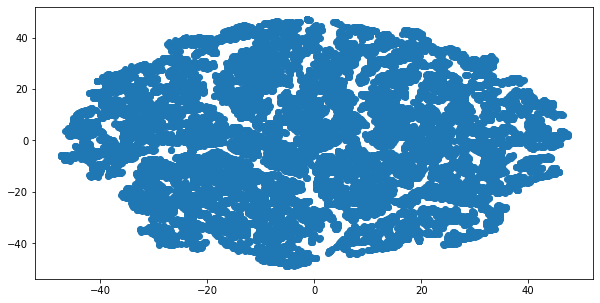

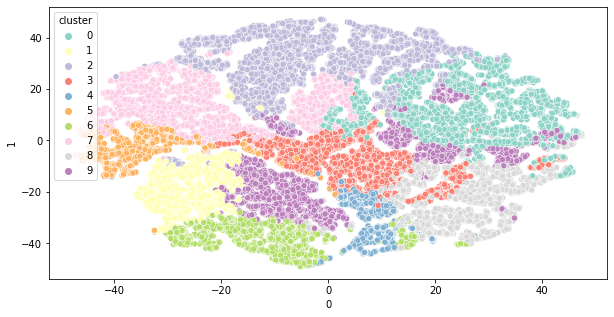

In [178]:
npscore = np.array(score)
npcluster = np.array(cluster)

highscore = np.max(npscore)
highscorearg = np.argmax(npscore)
highscorecluster = npcluster[highscorearg]

lowdimdf = pd.DataFrame(lowdim)
Kmeansmodel = KMeans(n_clusters= 10,algorithm='auto')
Kmeansmodel.fit(lowdim)

result = lowdimdf.copy()
result["cluster"] = Kmeansmodel.labels_

from sklearn.metrics import silhouette_samples, silhouette_score
    # result의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(lowdim, result['cluster'])
# print(score_samples)

# result에 실루엣 계수 컬럼 추가
result['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함.
average_score = silhouette_score(lowdim, result['cluster'])
score.append(average_score)

TSNE_model = TSNE(learning_rate=50)
tsne = TSNE_model.fit_transform(lowdim)
xs = tsne[:,0]
ys = tsne[:,1]
plt.figure(1,figsize = (10,5))
plt.scatter(xs,ys)

tsnedf = pd.DataFrame(tsne)
tsnedf["cluster"] = Kmeansmodel.labels_

print('dimension:', dimension, 'timestep: ', timestep)

print('highest score:', highscore, 'cluster number:', highscorecluster)
plt.figure(2,figsize = (10,5))

sns.scatterplot(x=0, y=1, hue="cluster", data=tsnedf, palette="Set3")
plt.show()



0.020 one label -1
0.021 one label -1
0.022 one label -1
0.023 one label -1
0.024 one label -1
0.025 one label -1
0.026 one label -1
0.027 one label -1
0.028 one label -1
0.029 one label -1
0.030 one label -1
0.031 one label -1
0.032 one label -1
0.033 one label -1
0.034 one label -1
0.035 one label -1
0.036 one label -1
0.037 one label 0
0.038 Silhouette Analysis Score: 0.8011517 3
[31795    16    30    17    15]
0.039 Silhouette Analysis Score: 0.76215523 6
[31746    16    32    17    16    16    15    15]


<AxesSubplot:xlabel='0', ylabel='1'>

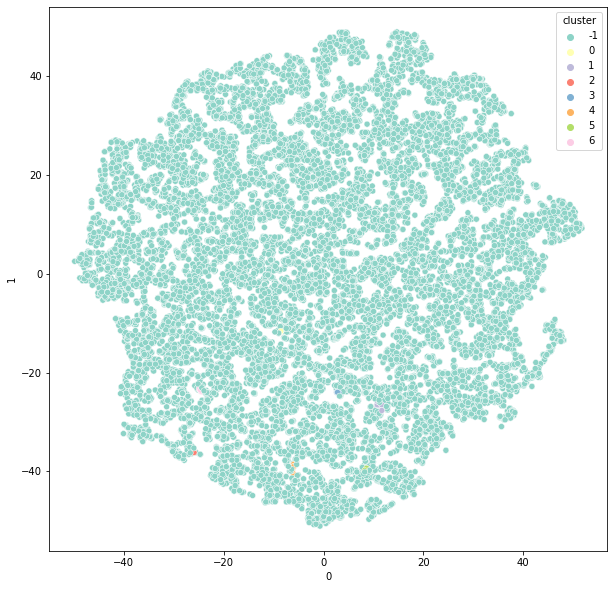

In [88]:
dbcluster = []
dbscore = []


for i in range (1,10):
    #0.01 ~ 0.1 -> 0.005~ 0.05
    i = i * 0.001
    dbscan = DBSCAN(eps=i, min_samples=15)
    dbclusters = dbscan.fit_predict(lowdim)

    dbresult = lowdimdf.copy()

    # dbclusters = [x+1 for x in dbclusters]
    dbresult["cluster"] = dbclusters

    newcluster = [-1]
    newresult = dbresult.loc[[0]]
    newlowdim = []
    
    try:
        dbscore_samples = silhouette_samples(lowdim, dbresult['cluster'])
        dbresult['silhouette_coeff'] = dbscore_samples
        dbaverage_score = silhouette_score(lowdim, dbresult['cluster'])

        for k in range(len(dbclusters)):
            if dbresult['cluster'][k] != -1:
                newcluster.append(dbresult['cluster'][k])
                newresult = pd.concat([newresult,dbresult.loc[[k]]])
                newlowdim.append(lowdim[k])



        newresult["cluster"] = newcluster
        newresult = newresult.drop(newresult.index[0])
#         newscore_samples = silhouette_samples(newlowdim, newresult['cluster'])
#         newresult['silhouette_coeff'] = newscore_samples
        newaverage_score = silhouette_score(newlowdim, newresult['cluster'])

        print("{:.3f}".format(i), 'Silhouette Analysis Score:', newaverage_score, max(newcluster))
        dbscore.append(newaverage_score)
        
        aUnique = np.array(dbclusters)
        unique, counts = np.unique(aUnique, return_counts=True)
        print(counts)
    except:
        print("{:.3f}".format(i), 'one label', max(newcluster))





dbtsnedf = pd.DataFrame(tsne)
dbtsnedf["cluster"] = dbresult['cluster']

plt.figure(2,figsize = (10,10))

sns.scatterplot(x=0, y=1, hue="cluster", data=dbtsnedf, palette="Set3")

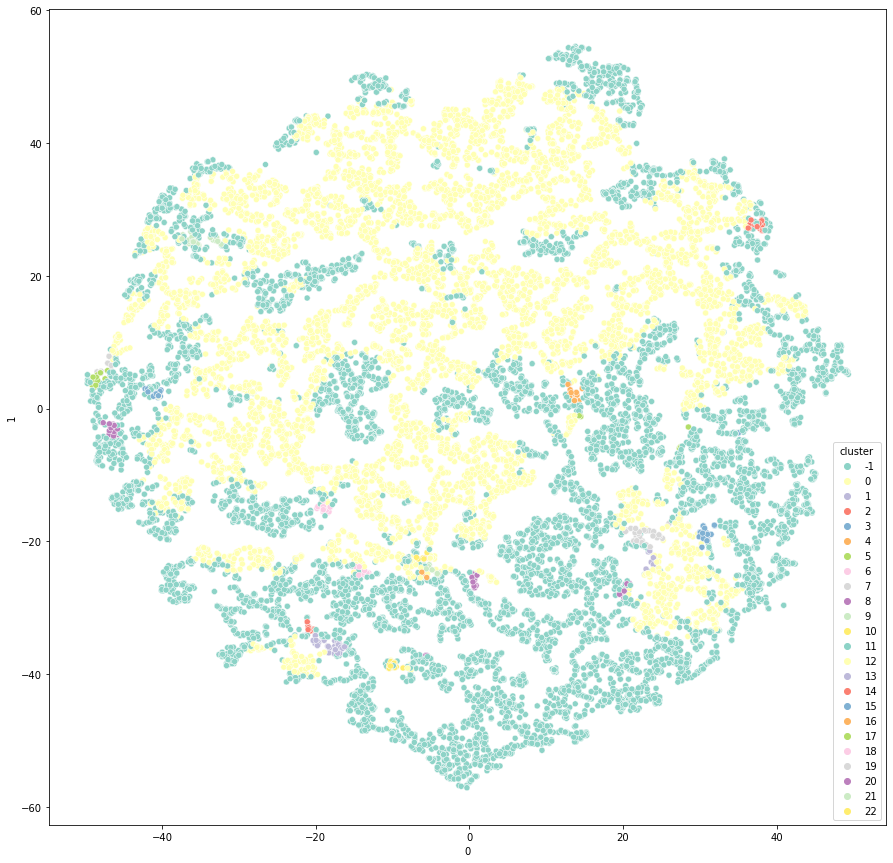

In [57]:
plt.figure(2,figsize = (15,15))

sns.scatterplot(x=0, y=1, hue="cluster", data=dbtsnedf, palette="Set3")
plt.show()

dimension: 7 timestep:  30


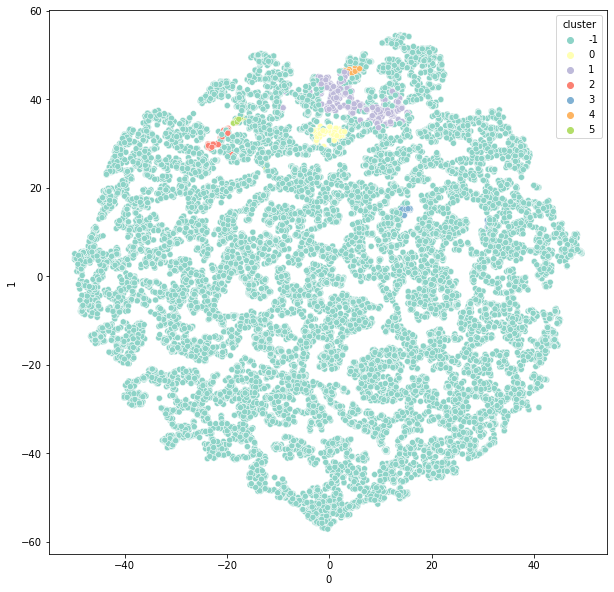

In [47]:
TSNE_model = TSNE(learning_rate=100, perplexity= 80)
tsne = TSNE_model.fit_transform(lowdim)
xs = tsne[:,0]
ys = tsne[:,1]


dbtsnedf = pd.DataFrame(tsne)
dbtsnedf["cluster"] = dbresult['cluster']

print('dimension:', dimension, 'timestep: ', timestep)

plt.figure(2,figsize = (10,10))

sns.scatterplot(x=0, y=1, hue="cluster", data=dbtsnedf, palette="Set3")
plt.show()

dimension: 7 timestep:  30


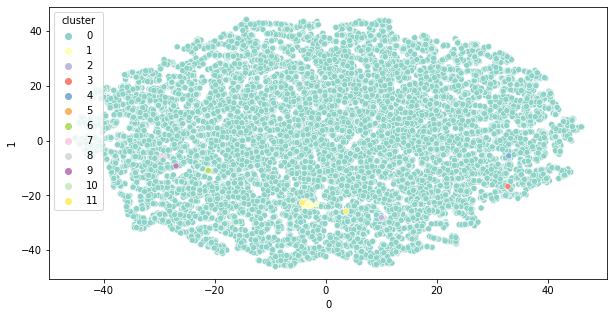

In [86]:
dbtsnedf = pd.DataFrame(tsne)
dbtsnedf["cluster"] = dbresult['cluster']

print('dimension:', dimension, 'timestep: ', timestep)

plt.figure(2,figsize = (10,10))

sns.scatterplot(x=0, y=1, hue="cluster", data=dbtsnedf, palette="Set3")
plt.show()